In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# input and output dir for load and save data
input_dir = '/content/drive/My Drive/Colab Notebooks/Suicide and Depression/data/input/'
output_dir = '/content/drive/My Drive/Colab Notebooks/Suicide and Depression/data/output/'

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
import time
import regex as re
from nltk.corpus import stopwords
from bs4 import BeautifulSoup
%matplotlib inline

In [ ]:
subreddits = ['depression', 'suicidewatch']

In [ ]:

df_depression = pd.read_csv(input_dir + 'depression_pre_small_new.csv')
df_suicidewatch = pd.read_csv(input_dir + 'suicidewatch_pre_small_new.csv')

df_depression.info()
df_suicidewatch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7499 entries, 0 to 7498
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   date       7499 non-null   object
 1   author     7499 non-null   object
 2   title      7499 non-null   object
 3   selftext   7499 non-null   object
 4   subreddit  7499 non-null   object
dtypes: object(5)
memory usage: 293.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8508 entries, 0 to 8507
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   date       8508 non-null   object
 1   author     8508 non-null   object
 2   title      8508 non-null   object
 3   selftext   8508 non-null   object
 4   subreddit  8508 non-null   object
dtypes: object(5)
memory usage: 332.5+ KB


In [ ]:
df_depression.shape

(7499, 5)

In [ ]:
df_suicidewatch.shape

(8508, 5)

In [ ]:
df_depression.describe()

,date,author,title,selftext,subreddit
count,7499,7499,7499,7499,7499
unique,31,6228,7041,7348,1
top,2022/12/12,Calm-Canary9561,Im done with this shit I’m committing suicide ...,Seeing people my age doing things like partyin...,depression
freq,336,31,17,43,7499


In [ ]:
df_suicidewatch.describe()

,date,author,title,selftext,subreddit
count,8508,8508,8508,8508,8508
unique,31,6551,7881,8347,1
top,2022/12/05,Competitive_Bat_5768,Help,Seeing people my age doing things like partyin...,suicidewatch
freq,323,31,20,37,8508


In [ ]:

#check and remove duplicate posts and drop them
df_depression = df_depression.drop_duplicates(subset='selftext', keep='first')
df_depression.shape

(7348, 5)

In [ ]:

#check and remove duplicate posts and drop them
df_suicidewatch = df_suicidewatch.drop_duplicates(subset='selftext', keep='first')
df_suicidewatch.shape

(8347, 5)

In [ ]:
df_depression.isnull().sum()

date         0
author       0
title        0
selftext     0
subreddit    0
dtype: int64

In [ ]:
df_suicidewatch.isnull().sum()

date         0
author       0
title        0
selftext     0
subreddit    0
dtype: int64

In [ ]:
#Function to check blank entries
def Check_blanks(df):
    print((df[df.columns] == '').sum())


Check_blanks(df_suicidewatch)
print('--------------')
Check_blanks(df_depression)

date         0
author       0
title        0
selftext     0
subreddit    0
dtype: int64
--------------
date         0
author       0
title        0
selftext     0
subreddit    0
dtype: int64


In [ ]:

#replace blank rows with NaN and remove
df_depression['title'].replace('', np.nan, inplace=True) 
df_depression['selftext'].replace('', np.nan, inplace=True)
df_depression.dropna(inplace=True) 
Check_blanks(df_depression)

date         0
author       0
title        0
selftext     0
subreddit    0
dtype: int64


In [ ]:

#replace blank rows with NaN and remove
df_suicidewatch['title'].replace('', np.nan, inplace=True) 
df_suicidewatch['selftext'].replace('', np.nan, inplace=True) 
df_suicidewatch.dropna(inplace=True) 
Check_blanks(df_suicidewatch)

date         0
author       0
title        0
selftext     0
subreddit    0
dtype: int64


In [ ]:
df_depression.shape

(7348, 5)

In [ ]:
df_suicidewatch.shape

(8347, 5)

In [ ]:
diff=len(df_suicidewatch)-len(df_depression)
print('Rows difference between fiction and real dataframes: ',diff)
print('Fiction data frame shape:' ,df_suicidewatch.shape)
print('Real data frame shape: ' ,df_depression.shape)
while len(df_depression) < len(df_suicidewatch):
    try:
        df_suicidewatch.drop(np.random.randint(low=0, high=len(df_suicidewatch)-1),inplace=True) #remove random rows
    except:
        pass
    

print('Fiction data frame shape after dropped rows:' ,df_suicidewatch.shape)
print('Real data frame shape: ' ,df_depression.shape)

Rows difference between fiction and real dataframes:  999
Fiction data frame shape: (8347, 5)
Real data frame shape:  (7348, 5)
Fiction data frame shape after dropped rows: (7348, 5)
Real data frame shape:  (7348, 5)


In [ ]:
#Convert all string values in 'title' and 'selftext' to lower case
df_depression['title']=df_depression['title'].str.lower()
df_depression['selftext']=df_depression['selftext'].str.lower()
df_suicidewatch['title']=df_suicidewatch['title'].str.lower()
df_suicidewatch['selftext']=df_suicidewatch['selftext'].str.lower()

In [ ]:
df_depression.head()

,date,author,title,selftext,subreddit
0,2022/12/03,StfuLou,does the funny feeling of ssris ever go away?,i have lexapro sitting in front of me and i ta...,depression
1,2022/12/03,evitecontacto,this is the first time in my adult life that i...,and i’m really suicidal. i don’t have a plan. ...,depression
2,2022/12/03,jwappy9,i have everything i could need and i still str...,"i recently got a new job, which i start in jan...",depression
3,2022/12/03,jaspi412,i’m just in a constant state of sadness…,today is my birthday. but while i see the firs...,depression
4,2022/12/03,PuzzleheadedOil9282,2023 ugh i going to remember this when i die a...,i’m 26 year old male i have 3 kids with 2 moth...,depression


In [ ]:
df_suicidewatch.head()

,date,author,title,selftext,subreddit
1,2022/12/24,Sea_Management1994,how does someone like me get better it s not ...,years old i literally have zero friends ...,suicidewatch
2,2022/12/24,No_Fan4911,do u relate,does anyone else just find things to look forw...,suicidewatch
3,2022/12/24,_mazelost,help,the feeling is just overwhelming i can t figh...,suicidewatch
5,2022/12/24,Significant-Hurry-34,should i,im getting decent grades in school but for my...,suicidewatch
6,2022/12/24,mybelovedz,help please,tw hi i m posting this here as i don t kno...,suicidewatch


In [ ]:
#Remove html tags and punctuation using regex
df_depression['title'] = df_depression['title'].str.replace("[^a-zA-Z]", " ",regex=True)
df_depression['selftext'] = df_depression['selftext'].str.replace("[^a-zA-Z]", " ",regex=True)
df_suicidewatch['title'] = df_suicidewatch['title'].str.replace("[^a-zA-Z]", " ",regex=True)
df_suicidewatch['selftext'] = df_suicidewatch['selftext'].str.replace("[^a-zA-Z]", " ",regex=True)

In [ ]:
df_depression.head()

,date,author,title,selftext,subreddit
0,2022/12/06,HedgehogNo7352,struggling to find out what to do with my life,i don t know what to do with my life every da...,depression
1,2022/12/06,SmellAmbitious3471,i ve had enough,my life is over anyway it has always been over...,depression
2,2022/12/06,ThrowRA_LateNiteRant,i feel that i m circling the drain,i m not suicidal or anything like that but w...,depression
3,2022/12/06,fiilthyratbag,spiraling,i m going through a recent breakup and it has ...,depression
4,2022/12/06,yessirskivolo,can you burnout at,i have been depressed for most of highschool ...,depression


In [ ]:
df_suicidewatch.head()

,date,author,title,selftext,subreddit
1,2022/12/24,Sea_Management1994,how does someone like me get better it s not ...,years old i literally have zero friends ...,suicidewatch
2,2022/12/24,No_Fan4911,do u relate,does anyone else just find things to look forw...,suicidewatch
3,2022/12/24,_mazelost,help,the feeling is just overwhelming i can t figh...,suicidewatch
5,2022/12/24,Significant-Hurry-34,should i,im getting decent grades in school but for my...,suicidewatch
6,2022/12/24,mybelovedz,help please,tw hi i m posting this here as i don t kno...,suicidewatch


In [ ]:
final_df=pd.concat([df_depression,df_suicidewatch])
final_df.shape

(14696, 5)

In [ ]:
final_df['text'] = final_df['title'].map(str) + ' ' + final_df['selftext']

In [ ]:
final_df.columns

Index(['date', 'author', 'title', 'selftext', 'subreddit', 'text'], dtype='object')

In [ ]:
final_df = final_df.drop(final_df.columns[[1, 2, 3]], axis=1) 

In [ ]:
#shuffle posts to randomise the order of the categories
final_df = shuffle(final_df)

In [ ]:
final_df.head()

,date,subreddit,text
8164,2022/12/23,suicidewatch,regret i committed suicide back in may and i ...
6602,2022/12/23,depression,ok the medication is working what do i do no...
5510,2022/12/29,depression,venting hate my life idk how many people are ...
3289,2022/12/12,suicidewatch,i am the problem in all of my issues if i have...
5933,2022/12/09,depression,living to survive too apprehensive about the ...


In [ ]:
#convert categories 'SuicideWatch' =1 and 'depression'=0
final_df['subreddit'] = final_df['subreddit'].map(dict(suicidewatch=1, depression=0))
final_df['subreddit'].value_counts()

1    7348
0    7348
Name: subreddit, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


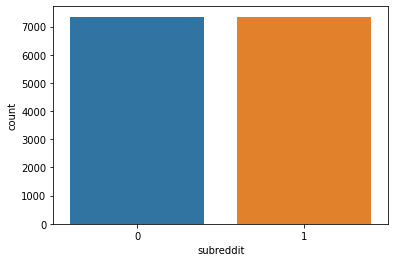

In [ ]:
# https://www.kaggle.com/code/yadhua/predicting-suicide-and-word-analysis
sns.countplot(final_df['subreddit'])
plt.show()

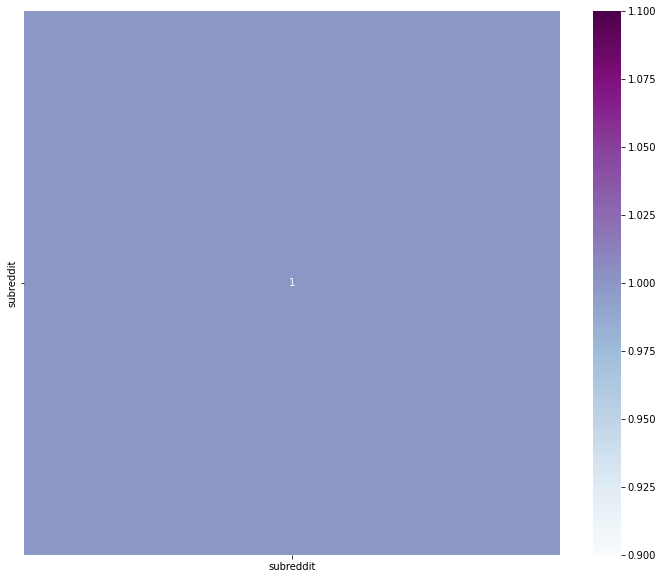

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (12,10))
p=sns.heatmap(final_df.corr(),annot=True,cmap = "BuPu")


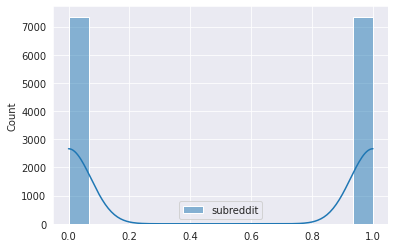

In [ ]:
#(https://medium.com/mlearning-ai/univariate-bivariate-and-multivariate-data-analysis-in-python-341493c3d173)
#Univariaate analysis
sns.set_style(style='darkgrid')
sns.histplot(final_df,kde=True)

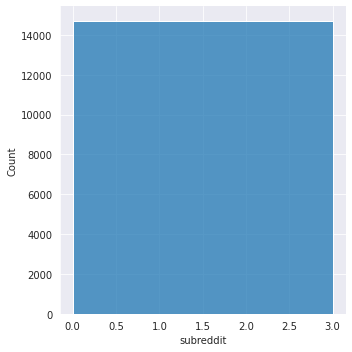

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.displot(final_df.subreddit, binwidth=3)

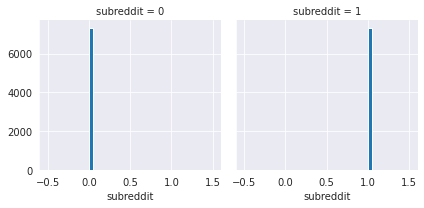

In [ ]:
from matplotlib import pyplot as plt

#bivariate analysis
a = sns.FacetGrid(final_df,col='subreddit')
a.map(plt.hist,'subreddit', bins=20)

In [ ]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14696 entries, 8164 to 2304
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   date       14696 non-null  object
 1   subreddit  14696 non-null  int64 
 2   text       14696 non-null  object
dtypes: int64(1), object(2)
memory usage: 975.3+ KB


In [ ]:
# calculate the skewness of a column in a Pandas DataFrame
print(final_df['subreddit'].describe())

count    14696.000000
mean         0.500000
std          0.500017
min          0.000000
25%          0.000000
50%          0.500000
75%          1.000000
max          1.000000
Name: subreddit, dtype: float64


In [ ]:
final_df.head()

,date,subreddit,text
8164,2022/12/23,1,regret i committed suicide back in may and i ...
6602,2022/12/23,0,ok the medication is working what do i do no...
5510,2022/12/29,0,venting hate my life idk how many people are ...
3289,2022/12/12,1,i am the problem in all of my issues if i have...
5933,2022/12/09,0,living to survive too apprehensive about the ...


In [ ]:
#final dataframes to csv
final_df.to_csv(output_dir+'final_data_medium.csv',index=False)